In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class StudentState(TypedDict):
    name: str
    total_marks: float
    obtained_marks: float
    percentage: float
    grade: str
    passed: bool
    summary: str

In [3]:
def calculate_percentage(state: StudentState) -> dict:
    percentage = (state["obtained_marks"] / state["total_marks"]) * 100
    return {"percentage": round(percentage, 2)}

In [4]:
def determine_grade(state: StudentState) -> dict:
    pct = state["percentage"]
    if pct >= 90:
        grade = "A+"
    elif pct >= 80:
        grade = "A"
    elif pct >= 70:
        grade = "B"
    elif pct >= 60:
        grade = "C"
    else:
        grade = "D"
    return {"grade": grade}

In [5]:
def pass_fail(state: StudentState) -> dict:
    passed = state["percentage"] >= 40
    return {"passed": passed}

In [6]:
def create_summary(state: StudentState) -> dict:
    status = "Passed" if state["passed"] else "Failed"
    summary = (
        f"Student: {state['name']}\n"
        f"Percentage: {state['percentage']}%\n"
        f"Grade: {state['grade']}\n"
        f"Status: {status}"
    )
    return {"summary": summary}

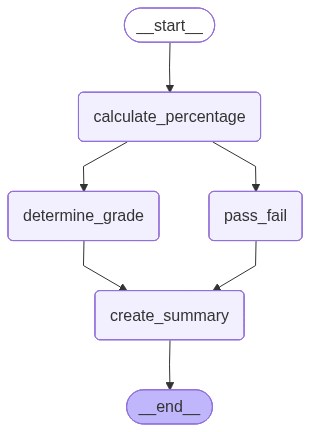

In [7]:
graph = StateGraph(StudentState)

graph.add_node("calculate_percentage", calculate_percentage)
graph.add_node("determine_grade", determine_grade)
graph.add_node("pass_fail", pass_fail)
graph.add_node("create_summary", create_summary)

graph.add_edge(START, "calculate_percentage")
graph.add_edge("calculate_percentage", "determine_grade")
graph.add_edge("calculate_percentage", "pass_fail")

graph.add_edge("determine_grade", "create_summary")
graph.add_edge("pass_fail", "create_summary")

graph.add_edge("create_summary", END)

# 8. Compile and run
app = graph.compile()
app

In [8]:
initial_state = {
    "name": "Abhishek",
    "total_marks": 500,
    "obtained_marks": 349,
}
response = app.invoke(initial_state)

print(response["summary"])


Student: Abhishek
Percentage: 69.8%
Grade: C
Status: Passed
